In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error, r2_score

In [25]:
df= pd.read_csv("Kl_Property_Listing.csv")

df

,ID,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Furnishing,Built_Type,Built_Size,Price_sqft,Price_room,Rooms_sqft
0,2,dutamas,1030000,3,4,2,Condominium,Partly Furnished,Built-up,1875,549.333333,3.433333e+05,625.000000
1,7,taman tun dr ismail,2600000,5,4,4,Semi-detached House,Partly Furnished,Land area,3600,722.222222,5.200000e+05,720.000000
2,9,sri petaling,385000,3,2,1,Apartment,Partly Furnished,Built-up,904,425.884956,1.283333e+05,301.333333
3,21,damansara heights,1550000,1,1,1,Serviced Residence,Fully Furnished,Built-up,904,1714.601770,1.550000e+06,904.000000
4,24,bangsar south,490000,1,1,1,Serviced Residence,Fully Furnished,Built-up,520,942.307692,4.900000e+05,520.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,53859,kuchai lama,300000,3,2,1,Serviced Residence,Unfurnished,Built-up,820,365.853658,1.000000e+05,273.333333
18940,53860,ampang,490000,1,1,1,Serviced Residence,Partly Furnished,Built-up,705,695.035461,4.900000e+05,705.000000
18941,53862,seputeh,750000,3,2,1,Condominium,Partly Furnished,Built-up,915,819.672131,2.500000e+05,305.000000
18942,53869,kl eco city,880000,1,1,1,Condominium,Partly Furnished,Built-up,650,1353.846154,8.800000e+05,650.000000


In [26]:
#Features and Target 
features = ['Location', 'Rooms', 'Bathrooms', 'Car Parks', 'Property Type', 'Built_Type', 'Built_Size']
target = 'Price'

X = df[features]
y = df[target]

In [27]:
#Categorizing data
categorical_features = ['Location', 'Property Type', 'Built_Type']
numeric_features = ['Rooms', 'Bathrooms', 'Car Parks', 'Built_Size']

In [28]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ],
    remainder='passthrough'  # Keep numeric features as they are
)


In [29]:
# Pipeline: preprocessing + model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [14]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1]:
# Train
model.fit(X_train, y_train)

NameError: name 'model' is not defined

In [17]:
# Predict
y_pred = model.predict(X_test)

In [30]:
# Evaluate
rmse = root_mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

rmse, r2

(696432.3149880118, 0.7922262847253045)

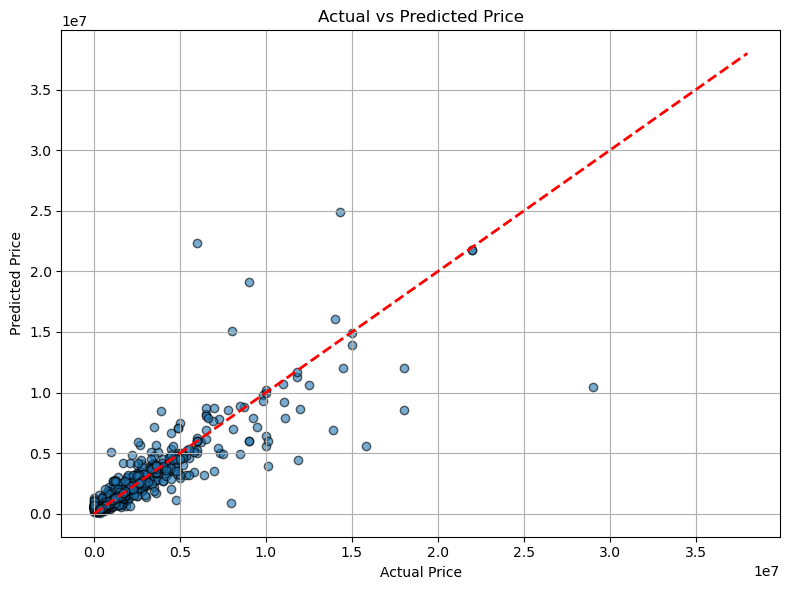

In [31]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)